In [64]:
import pandas as pd
import numpy as np
from numpy import median, average
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3  
from sqlalchemy import create_engine, select, MetaData, Table, Integer, String, inspect, Column, ForeignKey
import os

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [2]:
engine = create_engine('sqlite:////Users/marvinchan/Documents/PythonProgramming/apartment_scraper/apartments.db', echo=False)
connection = engine.raw_connection()
cursor = connection.cursor()
data = pd.read_sql_query('SELECT * FROM listings', connection)

In [7]:
data['city'] = ''

In [11]:
locations = sorted(data['location'].unique())
locations

['1990 Latham Street',
 '2006 Latham Street',
 '2020 Latham Street',
 '214 Lafayette Ave, Hayward, CA',
 '300 Talbot Ave, Santa Rosa, CA 95405',
 '570 Mariposa St San Francisco, California CA',
 '628 A Fell Street, San Francisco, CA',
 '880/85',
 'Airport~San Bruno',
 'Alameda',
 'Albany, CA',
 'Bay AREA',
 'Berkeley',
 'Burlingame',
 'Castro Valley',
 'Concord East bay near BART',
 'Downtown Mountain View',
 'Downtown Oakland',
 'East Oakland',
 'Emeryville',
 'Excelsior',
 'Fremont',
 'Gilroy',
 'Golden Gate Height',
 'Hayes Valley - San Francisco',
 'Hayes valley',
 'Hayward, CA',
 'Hillsborough',
 'Inner Richmond',
 'Jack London Square',
 'LOWER PACIFIC HEIGHTS',
 'Livermore',
 'Los Altos',
 'Milpitas',
 'Mission Terrace',
 'Nob Hill',
 'North Oakland',
 'Oakland',
 'Oakland hills',
 'Outer Richmond/ Sea Cliff',
 'Pacific Heights',
 'Petaluma',
 'Presidio',
 'Richmond',
 'Ricon Hill / SOMA / South Beach',
 'SOMA / south beach',
 'Salinas',
 'San Francisco',
 'San Francisco Richmond

In [35]:
city = {
    'oakland' : ['oakland downtown',
 'oakland east',
 'oakland hills / mills',
 'oakland lake merritt / grand',
 'oakland north / temescal',
 'oakland piedmont / montclair',
 'oakland rockridge / claremont',
 'oakland west', 'Jack London Square', 'Downtown Oakland',
 'East Oakland',  'North Oakland',
 'Oakland',
 'Oakland hills', 'West Oakland', 'Telegraph and 30th'],
    'berkeley' : ['south Berkeley', 'Berkeley', 'Albany, CA', 'berkeley',
 'berkeley north / hills', 'Emeryville', 'albany / el cerrito', 'emeryville'],
    'alameda' : ['Alameda', 'alameda'],
    'san jose' : ['san jose',
 'san jose downtown',
 'san jose east',
 'san jose north',
 'san jose south',
 'san jose west', '880/85', 'San Jose',
 'San Jose West', 'campbell',
 'San Jose, CA', 'silver creek/evergreen', 'sunnyvale', 'willow glen / cambrian'],
    'san francisco' : ['visitacion valley', 'Presidio', '570 Mariposa St San Francisco, California CA', 'bernal heights', 'Excelsior',
 '628 A Fell Street, San Francisco, CA', 'Golden Gate Height',
 'Hayes Valley - San Francisco',
 'Hayes valley', 'San Francisco','SoMa',
 'San Francisco Richmond/Seacliff',
 'San Francisco, CA', 'Ricon Hill / SOMA / South Beach',
 'SOMA / south beach', 'San francisco', 'twin peaks / diamond hts', 'potrero hill', 'sunset / parkside',
 'tenderloin', 'Inner Richmond', 'bayview', 'LOWER PACIFIC HEIGHTS', 'Mission Terrace', 'Nob Hill', 
 'Outer Richmond/ Sea Cliff', 'Pacific Heights', 'USF / panhandle', 'castro / upper market', 
 'alamo square / nopa', 'cole valley / ashbury hts', 'atherton', 'downtown / civic / van ness', 
 'ingleside / SFSU / CCSF', 'inner richmond', 'inner sunset / UCSF', 'laurel hts / presidio',
 'excelsior / outer mission', 'financial district', 'glen park', 'haight ashbury', 'hayes valley'
 'lower haight', 'lower nob hill', 'lower pac hts', 'marina / cow hollow', 
 'nob hill', 'mission district', 'noe valley', 'north beach / telegraph hill', 
 'western addition', 'west portal / forest hill', 'russian hill' ,'portola district','pacifica','pacific heights'],
     'south san francisco' : ['san bruno', 'millbrae', 'south san francisco', 'Burlingame', 'burlingame', 'Hillsborough', 'belmont', 'san mateo', 'daly city', 'foster city', 'menlo park'],
     'south bay' : ['saratoga', 'san carlos', 'redwood shores', 'redwood city', '1990 Latham Street', 'Downtown Mountain View', 'mountain view', '2006 Latham Street', 'Airport~San Bruno',
 '2020 Latham Street', 'Bay AREA', 'Sunny',
 'Sunnyvale', 'cupertino', 'east palo alto', 'los altos', 'Los Altos', 
 'morgan hill','los gatos', 'palo alto'],
    'hayward/dublin' : ['san leandro', 'hayward / castro valley', 'hayward', 'dublin / pleasanton / livermore', 'San Ramon', 'danville / san ramon', '214 Lafayette Ave, Hayward, CA', 'Castro Valley', 'Hayward, CA', 'Livermore'],
    'santa rosa' : ['sebastopol', 'rohnert pk / cotati', 'lake county', '300 Talbot Ave, Santa Rosa, CA 95405', 'Santa Rosa','santa rosa'],
    'concord' : ['walnut creek', 'pittsburg / antioch', 'lafayette / orinda / moraga', 'hercules, pinole, san pablo, el sob', 'Concord East bay near BART', 'brentwood / oakley', 'concord / pleasant hill / martinez'],
    'fremont/milpitas' : ['santa clara', 'milpitas', 'Fremont',  'Milpitas', 'Union City', 'fremont / union city / newark'],
    'santa cruz/gilroy' : ['watsonville', 'soquel', 'scotts valley', 'santa cruz', 'Gilroy', 'half moon bay', 'aptos', 'capitola', 'Salinas', 'santa cruz mountains', 'Valley >> Santa Cruz', 'gilroy'],
    'north bay' : ['sonoma', 'Petaluma', 'petaluma', 'novato', 'healdsburg / windsor'],
    'vallejo/richmond' : ['richmond / seacliff', 'richmond / point / annex', 'napa county', 'Richmond', 'vallejo / benicia', 'fairfield / vacaville'],
    'marin/san rafael' : ['west marin', 'sausalito', 'san rafael', 'san anselmo', 'mill valley', 'larkspur', 'Sausalito', 'kentfield / ross', 'corte madera', 'fairfax', 'greenbrae'],
    'lake tahoe' : ['South Lake Tahoe, CA', 'Tahoe Village, Stateline, NV'],
    'tracy' : ['Tracy', 'Tracy CA', 'Tracy, CA'],
    'sacramento' : ['West Sacramento'],
    'outside bay area': ['tiburon / belvedere']}

In [39]:
data['location'] = data['location'].str.lower()
data['location'].unique()

array(['lower nob hill', 'santa clara', 'west oakland', 'mountain view',
       'oakland north / temescal', 'north oakland', 'santa cruz',
       'san jose downtown', 'nob hill', 'oakland downtown',
       'excelsior / outer mission', 'ingleside / sfsu / ccsf', 'berkeley',
       'san leandro', 'san jose east', 'vallejo / benicia',
       'laurel hts / presidio', 'redwood city', 'alameda', 'tenderloin',
       'soma / south beach', 'san mateo', 'usf / panhandle',
       'walnut creek', 'richmond / seacliff', 'oakland east',
       'bernal heights', 'telegraph and 30th', 'sunnyvale',
       'redwood shores', 'financial district', '2006 latham street',
       'haight ashbury', 'west portal / forest hill',
       'dublin / pleasanton / livermore', 'palo alto', 'san jose north',
       'hayes valley', 'oakland hills / mills', 'mill valley',
       'cupertino', 'daly city', 'alamo square / nopa', 'pacific heights',
       'lower pac hts', 'albany / el cerrito', '2020 latham street',
       

In [54]:
city

{'oakland': ['downtown oakland',
  'east oakland',
  'jack london square',
  'north oakland',
  'oakland',
  'oakland downtown',
  'oakland east',
  'oakland hills',
  'oakland hills / mills',
  'oakland lake merritt / grand',
  'oakland north / temescal',
  'oakland piedmont / montclair',
  'oakland rockridge / claremont',
  'oakland west',
  'telegraph and 30th',
  'west oakland'],
 'berkeley': ['albany / el cerrito',
  'albany, ca',
  'berkeley',
  'berkeley north / hills',
  'emeryville',
  'south berkeley'],
 'alameda': ['alameda'],
 'san jose': ['880/85',
  'campbell',
  'san jose',
  'san jose downtown',
  'san jose east',
  'san jose north',
  'san jose south',
  'san jose west',
  'san jose, ca',
  'silver creek/evergreen',
  'sunnyvale',
  'willow glen / cambrian'],
 'san francisco': ['570 mariposa st san francisco, california ca',
  '628 a fell street, san francisco, ca',
  'alamo square / nopa',
  'atherton',
  'bayview',
  'bernal heights',
  'castro / upper market',
  'co

In [53]:
import itertools

for k, v in city.items():
    v.sort()
    city[k] = [item for item, _ in itertools.groupby(v)]
    
city

{'oakland': ['downtown oakland',
  'east oakland',
  'jack london square',
  'north oakland',
  'oakland',
  'oakland downtown',
  'oakland east',
  'oakland hills',
  'oakland hills / mills',
  'oakland lake merritt / grand',
  'oakland north / temescal',
  'oakland piedmont / montclair',
  'oakland rockridge / claremont',
  'oakland west',
  'telegraph and 30th',
  'west oakland'],
 'berkeley': ['albany / el cerrito',
  'albany, ca',
  'berkeley',
  'berkeley north / hills',
  'emeryville',
  'south berkeley'],
 'alameda': ['alameda'],
 'san jose': ['880/85',
  'campbell',
  'san jose',
  'san jose downtown',
  'san jose east',
  'san jose north',
  'san jose south',
  'san jose west',
  'san jose, ca',
  'silver creek/evergreen',
  'sunnyvale',
  'willow glen / cambrian'],
 'san francisco': ['570 mariposa st san francisco, california ca',
  '628 a fell street, san francisco, ca',
  'alamo square / nopa',
  'atherton',
  'bayview',
  'bernal heights',
  'castro / upper market',
  'co

In [57]:
reversed_dict = {val: key for key in city for val in city[key]}
reversed_dict

{'downtown oakland': 'oakland',
 'east oakland': 'oakland',
 'jack london square': 'oakland',
 'north oakland': 'oakland',
 'oakland': 'oakland',
 'oakland downtown': 'oakland',
 'oakland east': 'oakland',
 'oakland hills': 'oakland',
 'oakland hills / mills': 'oakland',
 'oakland lake merritt / grand': 'oakland',
 'oakland north / temescal': 'oakland',
 'oakland piedmont / montclair': 'oakland',
 'oakland rockridge / claremont': 'oakland',
 'oakland west': 'oakland',
 'telegraph and 30th': 'oakland',
 'west oakland': 'oakland',
 'albany / el cerrito': 'berkeley',
 'albany, ca': 'berkeley',
 'berkeley': 'berkeley',
 'berkeley north / hills': 'berkeley',
 'emeryville': 'berkeley',
 'south berkeley': 'berkeley',
 'alameda': 'alameda',
 '880/85': 'san jose',
 'campbell': 'san jose',
 'san jose': 'san jose',
 'san jose downtown': 'san jose',
 'san jose east': 'san jose',
 'san jose north': 'san jose',
 'san jose south': 'san jose',
 'san jose west': 'san jose',
 'san jose, ca': 'san jose',

In [58]:
data['city'] = data['location'].map(reversed_dict)

In [59]:
data

,id,link,created,geotag,lat,lon,name,price,location,cl_id,city
0,1,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-05-21 22:24:00.000000,None,37.787262,-122.416505,Updated Studio | 1st Floor | Pet Friendly,1595.0,lower nob hill,7128341766,san francisco
1,2,https://sfbay.craigslist.org/sby/apa/d/santa-c...,2020-05-21 22:24:00.000000,None,37.337241,-121.988585,COMPLETELY Renovated 1 bedroom + 1 full bath -...,2145.0,santa clara,7128351433,fremont/milpitas
2,3,https://sfbay.craigslist.org/eby/apa/d/oakland...,2020-05-21 22:23:00.000000,None,37.817939,-122.278934,"""FULLY REMODELED"" 2 Bdrm, 1 Bath, 4plex",2495.0,west oakland,7128350400,oakland
3,4,https://sfbay.craigslist.org/sby/apa/d/los-alt...,2020-05-21 22:23:00.000000,None,37.400633,-122.102777,"Mountain View 1BR 1BA apt, Sparkling white kit...",2495.0,mountain view,7112861076,south bay
4,5,https://sfbay.craigslist.org/eby/roo/d/oakland...,2020-05-21 22:22:00.000000,None,37.854826,-122.217478,Oakland-ish - Bright & Spacious Room Now Avail...,1200.0,oakland north / temescal,7119705958,oakland
5,6,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-05-21 22:22:00.000000,None,37.787739,-122.415226,REMODELED ONE BEDROOM OVERLOOKING GARDEN,2700.0,lower nob hill,7116536220,san francisco
6,7,https://sfbay.craigslist.org/eby/apa/d/oakland...,2020-05-21 22:22:00.000000,None,37.820748,-122.271498,"""FULLY REMODELED"" 3 Beds, 1 Bath, Duplex",2695.0,north oakland,7128350319,oakland
7,8,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-05-21 22:22:00.000000,None,37.789097,-122.417122,Remodeled 1 Bedroom located in Lower Nob Hill,2395.0,lower nob hill,7115423785,san francisco
8,9,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-05-21 22:22:00.000000,None,37.789097,-122.417122,Bright and Spacious 1 Bedroom located in Lower...,2350.0,lower nob hill,7115423942,san francisco
9,10,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2020-05-21 22:21:00.000000,None,37.787275,-122.413273,Bright Studio located in Lower Nob Hill,1895.0,lower nob hill,7114432213,san francisco


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

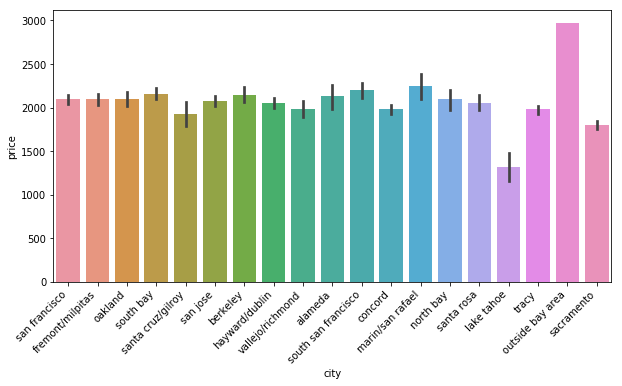

In [77]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="city", y="price", data=data, estimator=average)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

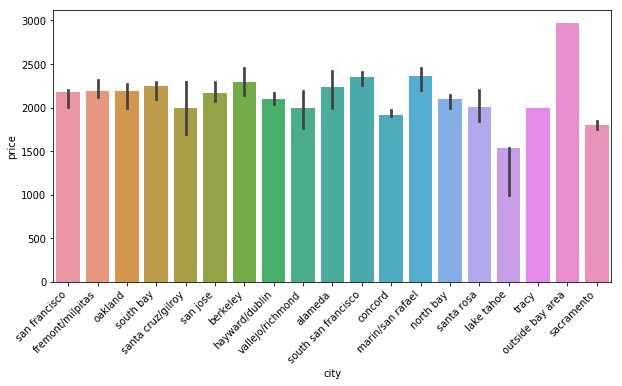

In [78]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="city", y="price", data=data, estimator=median)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

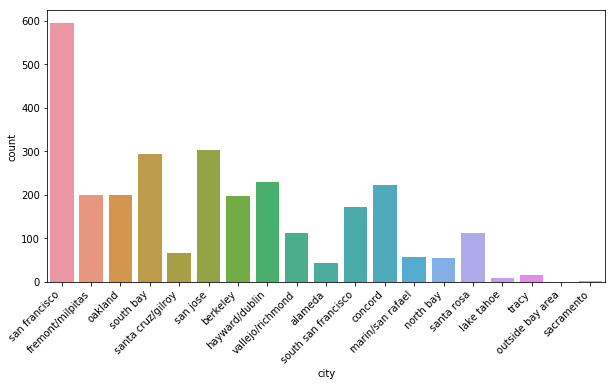

In [82]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='city', data=data)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

In [85]:
ignore = data[data['city'].isin(['outside bay area'])]
ignore

,id,link,created,geotag,lat,lon,name,price,location,cl_id,city
1308,1309,https://sfbay.craigslist.org/nby/apa/d/midkiff...,2020-05-22 09:18:00.000000,None,31.474189,-101.83457,"Private Tiburon rental, furnished/unf. - pano...",2970.0,tiburon / belvedere,7127082925,outside bay area
